# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [6]:
# Take make moons in built dataset

data_ = datasets.make_moons(200)

In [7]:
# check the dataset

data_

(array([[ 4.99288823e-02,  1.87966554e-01],
        [ 3.20512986e-02,  2.48852013e-01],
        [ 2.66473814e-01,  9.63842159e-01],
        [ 1.10838200e-01,  9.93838464e-01],
        [ 1.67850941e+00, -2.34591709e-01],
        [ 1.47227107e+00, -3.81453363e-01],
        [-9.81928697e-01,  1.89251244e-01],
        [ 9.59492974e-01,  2.81732557e-01],
        [-5.27225468e-01,  8.49725430e-01],
        [-6.54860734e-01,  7.55749574e-01],
        [-3.27067963e-01,  9.45000819e-01],
        [ 7.66044443e-01,  6.42787610e-01],
        [ 2.01332353e-03,  4.36576080e-01],
        [ 1.99949654e+00,  4.68272067e-01],
        [-9.75429787e-01,  2.20310533e-01],
        [ 1.23575894e+00, -4.71811568e-01],
        [-1.00000000e+00,  1.22464680e-16],
        [ 5.03457617e-04,  4.68272067e-01],
        [-2.04806668e-01,  9.78802446e-01],
        [ 2.76265962e-01, -1.90079011e-01],
        [ 1.11164551e-01,  4.17734783e-02],
        [ 1.20480667e+00, -4.78802446e-01],
        [ 1.88883545e+00,  4.177

In [8]:
# create input dataframe

inputData = pd.DataFrame(data=data_[0])

In [9]:
inputData.head()

,0,1
0,0.049929,0.187967
1,0.032051,0.248852
2,0.266474,0.963842
3,0.110838,0.993838
4,1.678509,-0.234592


In [10]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,1
2,0
3,0
4,1


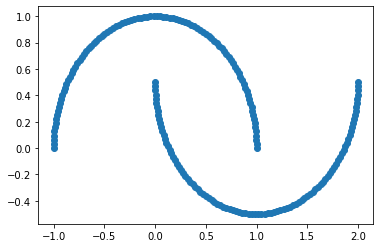

In [11]:
# create a scatter plot for inputData set

plt.scatter(inputData[0], inputData[1])

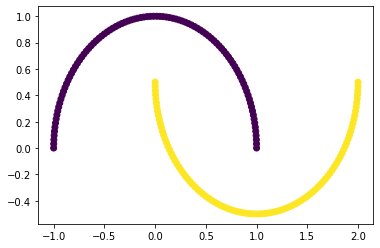

In [12]:
# create a scatter plot for inputData set with outputData color
plt.scatter(inputData[0], inputData[1], c = outputData)


In [13]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
# check for labels

model.labels_

array([4, 4, 4, 4, 0, 0, 1, 2, 1, 1, 4, 2, 4, 0, 1, 0, 1, 4, 4, 3, 3, 0,
       0, 0, 0, 2, 1, 4, 2, 0, 0, 0, 3, 0, 4, 3, 4, 3, 1, 1, 0, 4, 1, 2,
       0, 3, 1, 3, 2, 1, 2, 1, 3, 0, 4, 1, 3, 1, 4, 0, 2, 3, 3, 3, 4, 4,
       2, 3, 2, 3, 0, 2, 0, 1, 0, 0, 2, 4, 2, 3, 4, 4, 1, 4, 0, 1, 4, 3,
       4, 3, 0, 0, 1, 2, 0, 3, 0, 3, 4, 2, 3, 1, 3, 2, 4, 0, 1, 3, 2, 3,
       4, 4, 2, 1, 3, 4, 0, 1, 1, 1, 1, 2, 2, 4, 3, 1, 0, 1, 0, 4, 2, 2,
       4, 0, 3, 4, 3, 3, 3, 2, 0, 0, 2, 2, 4, 1, 2, 3, 4, 4, 4, 1, 1, 3,
       2, 3, 4, 0, 3, 2, 3, 4, 3, 0, 3, 3, 2, 4, 4, 4, 3, 3, 2, 4, 3, 2,
       3, 0, 1, 1, 0, 0, 3, 4, 0, 0, 4, 1, 0, 2, 0, 0, 2, 0, 4, 0, 2, 3,
       3, 4], dtype=int32)

In [41]:
# call metrics and check silhoutte score

from sklearn import metrics
metrics.silhouette_score(inputData, model.labels_)


0.49099614329904306

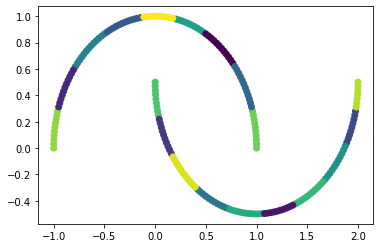

In [42]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData[0], inputData[1], c = model.labels_)

#### finding right number of cluster

In [43]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

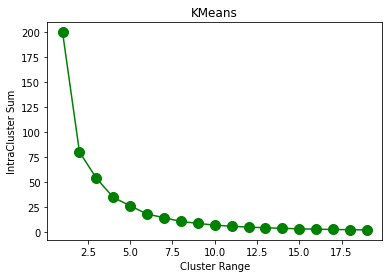

In [44]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()